# Visualizations
This notebook contains all the visualizations that are used in thesis.

In [ ]:
# %pip install qutip
# %pip install mayavi
%pip install pdf2image
%pip install pdflatex

In [15]:
SAVE_DIRECTORY = '../images/'

## Qubit in zero state (initial state)

In [ ]:
from qutip import *

b = Bloch()
b.vector_color = ['b']
b.vector_width = 4

initial_state = basis(2, 0)
b.add_states(initial_state)
b.save(name=SAVE_DIRECTORY+'qubit-zero-state.png', dpin=400)
b.show()

## X-gate rotation

In [ ]:
from qutip import *
import numpy as np  

initial_state = basis(2, 0)
x_gate = sigmax()
final_state = x_gate * initial_state

b = Bloch()
b.point_color = ['b']
b.vector_color = ['b']
b.vector_width = 4

b.add_states(final_state)

point_count = 25

th = np.linspace(0, -np.pi, point_count)
xz = np.zeros(point_count)
yz = np.sin(th)
zz = np.cos(th)

b.add_points([xz, yz, zz])
b.render()
b.save(name=SAVE_DIRECTORY+'qubit-x-gate.png', dpin=400)
b.show()

## X-gate icon

In [ ]:
from qiskit import QuantumCircuit

q = QuantumCircuit(1)
qc = QuantumCircuit(1)
qc.x(0)

qc.draw('mpl', scale=10)

## Y-gate rotation

In [ ]:
from qutip import *
import numpy as np  

initial_state = basis(2, 0)
y_gate = sigmay()
final_state = y_gate * initial_state

b = Bloch()
b.point_color = ['b']
b.vector_color = ['b']
b.vector_width = 4

b.add_states(final_state)

point_count = 25

th = np.linspace(0, np.pi, point_count)
yz = np.zeros(point_count)
xz = np.sin(th)
zz = np.cos(th)

b.add_points([xz, yz, zz])
b.render()
b.save(name=SAVE_DIRECTORY+'qubit-y-gate.png', dpin=400)
b.show()

## Z-gate rotation

In [ ]:
from qutip import *

vec = [[1, 0, 0]]

b = Bloch()
b.point_color = ['b']
b.vector_color = ['b']
b.vector_width = 4

b.add_vectors(vec)
# b.save(name=SAVE_DIRECTORY+'qubit-superposition.png', dpin=400)
b.show()

In [ ]:
from qutip import *
import numpy as np  

final_state = [[-1, 0, 0]]


b = Bloch()
b.point_color = ['b']
b.vector_color = ['b']
b.vector_width = 4

b.add_vectors(final_state)

point_count = 25

th = np.linspace(0, np.pi, point_count)
zz = np.zeros(point_count)
xz = np.cos(th)
yz = np.sin(th)

b.add_points([xz, yz, zz])
b.render()
b.save(name=SAVE_DIRECTORY+'qubit-z-gate.png', dpin=400)
b.show()

## Measurement icon

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.measure(0,0)

qc.draw('mpl', scale=10)

## Qiskit tool for transitions

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import visualize_transition, plot_bloch_vector

qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)

qc.draw()

# plot_bloch_vector([0,1,0], title='My Bloch Sphere')
visualize_transition(circuit=qc, trace=True)

## Shots distribution on statevector

In [ ]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# each state is equally likely
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.h(1)
circ.h(2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal1 = qiskit.execute(circ, aersim, shots=500).result()
counts_ideal1 = result_ideal1.get_counts(0)

result_ideal2 = qiskit.execute(circ, aersim, shots=5000).result()
counts_ideal2 = result_ideal2.get_counts(0)

print(counts_ideal1)
print(counts_ideal2)

plot_histogram(counts_ideal1)
# plot_histogram(counts_ideal2)

# plt, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# ax1.hist(counts_ideal1)
# ax2.hist(counts_ideal2)

# plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sorting data based on keys
sorted_data1 = dict(sorted(counts_ideal1.items()))
sorted_data2 = dict(sorted(counts_ideal2.items()))

# Extracting keys and values from sorted dictionaries
labels1, values1 = zip(*sorted_data1.items())
labels2, values2 = zip(*sorted_data2.items())

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

# Plotting the first histogram
bars1 = axs[0].bar(labels1, values1, color='blue', alpha=0.7)
axs[0].set_title('500 shots', fontsize=12)  # Set title font size

# Adding counts above each bar in the first histogram
for bar, count in zip(bars1, values1):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom', color='black', fontsize=12, zorder=2)

# Plotting the second histogram
bars2 = axs[1].bar(labels2, values2, color='orange', alpha=0.7)
axs[1].set_title('5000 shots', fontsize=12)  # Set title font size

# Adding counts above each bar in the second histogram
for bar, count in zip(bars2, values2):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom', color='black', fontsize=12, zorder=2)

# Set axis label font size
for ax in axs:
    ax.tick_params(axis='both', labelsize=12)

# Adjusting layout and spacing
plt.tight_layout()
axs[0].margins(y=0.1)
axs[1].margins(y=0.1)

# Display the plot
plt.show()


## Ansatz expressibility

### RY circuit

In [ ]:
from qutip import *
import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.quantum_info import Statevector

np.random.seed(0)
num_param = 200

x_param = Parameter('θ')

qc = QuantumCircuit(1)
qc.ry(x_param, 0)

theta = [2*np.pi*np.random.uniform() for i in range(num_param)]

b = Bloch()
b.point_color = ['b']
b.vector_color = ['b']
b.point_marker = ['o']
b.vector_width = 4
b.point_size = [20]

def state_to_bloch(state_vec):
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]

for i in range(num_param):
    state = Statevector.from_instruction(
        qc.assign_parameters({x_param: theta[i]}))
    b.add_points(state_to_bloch(state))

b.save(name=SAVE_DIRECTORY+'expressibility-ry-qubit.png', dpin=400)
b.show()
qc.draw(output='mpl', style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}expressibility-ry-circuit.png')

### H-RZ-RX circuit

In [ ]:
from qutip import *
import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.quantum_info import Statevector

np.random.seed(0)
num_param = 1000

x_param = Parameter('θ')
y_param = Parameter('φ')

qc = QuantumCircuit(1)
qc.h(0)
qc.rz(x_param, 0)
qc.rx(y_param, 0)

theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

b = Bloch()
b.point_color = ['b']
b.vector_color = ['b']
b.point_marker = ['o']
b.vector_width = 4
b.point_size = [20]

def state_to_bloch(state_vec):
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]

for i in range(num_param):
    state = Statevector.from_instruction(
        qc.assign_parameters({x_param: theta[i], y_param: phi[i]}))
    b.add_points(state_to_bloch(state))

b.save(name=SAVE_DIRECTORY+'expressibility-hrzrx-qubit.png', dpin=400)
b.show()
qc.draw(output='mpl', style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}expressibility-hrzrx-circuit.png')

## Circuit depth visualization

### circuit depth = 1

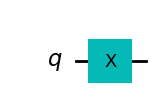

In [8]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl', style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}circuit-depth-1.png')

### circuit depth = 3

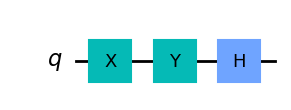

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.h(0)

qc.draw(output='mpl', style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}circuit-depth-3.png')

### circuit depth = 6

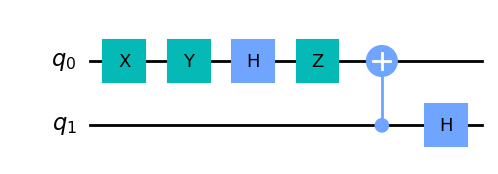

In [11]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.x(0)
qc.y(0)
qc.h(0)
qc.z(0)
qc.cx(1,0)
qc.h(1)

qc.draw(output='mpl', style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}circuit-depth-6.png')

## Visualize ansatzes

In [11]:
from qiskit.circuit.library import TwoLocal

NUM_QUBITS = 4
INSERT_BARRIES = True
ROTATION_BLOCKS = ['ry']
ENTANGLEMENT_BLOCKS = ['cx']
REPS = 2

### Linear ansatz

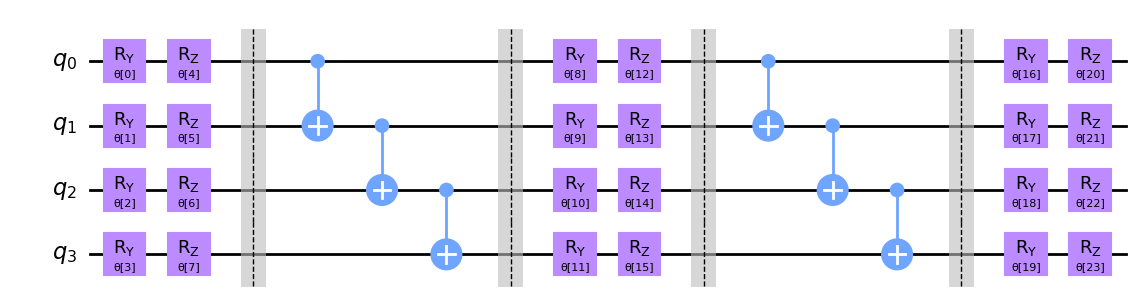

In [16]:
linear_ansatz = TwoLocal(
    num_qubits=NUM_QUBITS,
    rotation_blocks=ROTATION_BLOCKS,
    entanglement_blocks=ENTANGLEMENT_BLOCKS,
    entanglement='linear',
    reps=REPS,
    insert_barriers=INSERT_BARRIES,
)
linear_ansatz.decompose().draw("mpl", style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}linear-ansatz.png')

### Full ansatz

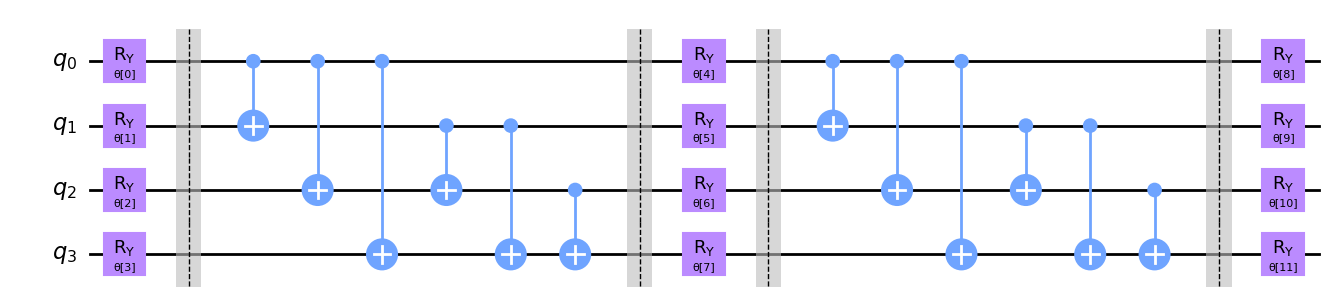

In [17]:
linear_ansatz = TwoLocal(
    num_qubits=NUM_QUBITS,
    rotation_blocks=ROTATION_BLOCKS,
    entanglement_blocks=ENTANGLEMENT_BLOCKS,
    entanglement='full',
    reps=REPS,
    insert_barriers=INSERT_BARRIES,
)
linear_ansatz.decompose().draw("mpl", style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}full-ansatz.png')

### Circular ansatz

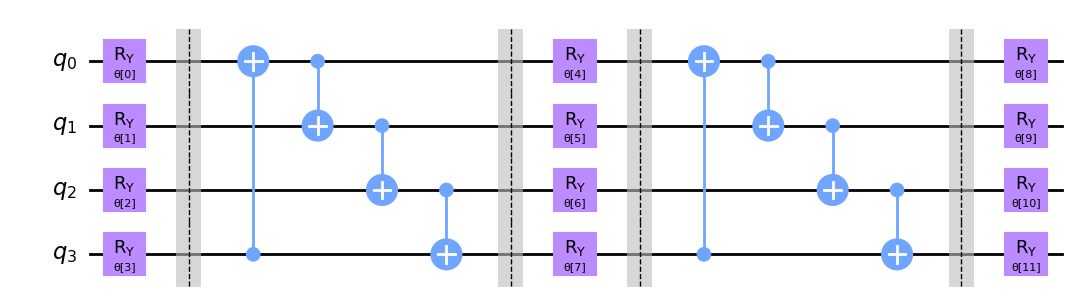

In [18]:
linear_ansatz = TwoLocal(
    num_qubits=NUM_QUBITS,
    rotation_blocks=ROTATION_BLOCKS,
    entanglement_blocks=ENTANGLEMENT_BLOCKS,
    entanglement='circular',
    reps=REPS,
    insert_barriers=INSERT_BARRIES,
)
linear_ansatz.decompose().draw("mpl", style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}circular-ansatz.png')

### Pairwise ansatz

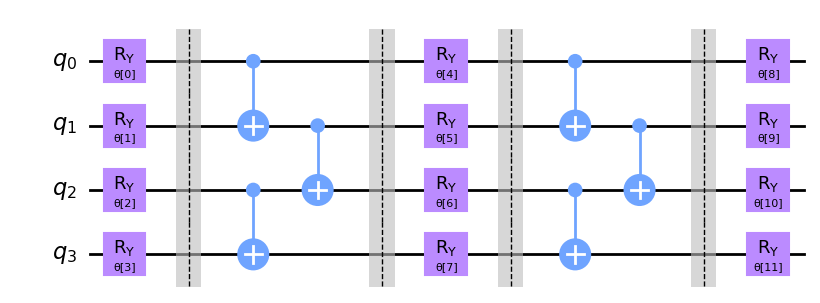

In [19]:
linear_ansatz = TwoLocal(
    num_qubits=NUM_QUBITS,
    rotation_blocks=ROTATION_BLOCKS,
    entanglement_blocks=ENTANGLEMENT_BLOCKS,
    entanglement='pairwise',
    reps=REPS,
    insert_barriers=INSERT_BARRIES,
)
linear_ansatz.decompose().draw("mpl", style={
        'dpi': 400}, filename=f'{SAVE_DIRECTORY}pairwise-ansatz.png')